# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Count Through Data
record = 1
set = 1
# Create weatherPy dataframe
weather_df = pd.DataFrame({'City': cities})
weather_df['Lat'] = ''
weather_df['Lng'] = ''
weather_df['Max Temp'] = ''
weather_df['Humidity'] = ''
weather_df['Cloudiness'] = ''
weather_df['Wind Speed'] = ''
weather_df['Country'] = ''
weather_df['Date'] = ''
print('Beginning Data Retrieval')
print('-------------------------------')
# Loop through weather_df
for index, row in weather_df.iterrows():
    city = row['City']
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    response = requests.get(url).json()
    try:
        print(f'Processing Record {record} of Set {set} | {city}')
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response["coord"]['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']["temp_max"]
        weather_df.loc[index, 'Humidity'] = response['main']["humidity"]
        weather_df.loc[index, 'Cloudiness'] = response['clouds']["all"]
        weather_df.loc[index, 'Wind Speed'] = response['wind']["speed"]
        weather_df.loc[index, 'Country'] = response['sys']["country"]
        weather_df.loc[index, 'Date'] = response['dt']
    except:
        print(f'City not found')
    record += 1
    if record == 51:
        record = 1
        set += 1
print('-------------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | paducah
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | neyshabur
Processing Record 5 of Set 1 | oakdale
Processing Record 6 of Set 1 | mayor pablo lagerenza
Processing Record 7 of Set 1 | pietarsaari
Processing Record 8 of Set 1 | santa vitoria do palmar
Processing Record 9 of Set 1 | pedro carbo
Processing Record 10 of Set 1 | mys shmidta
City not found
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | sun city
Processing Record 16 of Set 1 | quatre cocos
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | huejuquilla el alto
Proce

Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | kaohsiung
Processing Record 44 of Set 4 | maues
Processing Record 45 of Set 4 | buraydah
Processing Record 46 of Set 4 | ambilobe
Processing Record 47 of Set 4 | batagay-alyta
Processing Record 48 of Set 4 | portland
Processing Record 49 of Set 4 | nome
Processing Record 50 of Set 4 | wilmington
Processing Record 1 of Set 5 | aloleng
Processing Record 2 of Set 5 | palmares do sul
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | severo-yeniseyskiy
Processing Record 5 of Set 5 | rocha
Processing Record 6 of Set 5 | woodstock
Processing Record 7 of Set 5 | nakambala
Processing Record 8 of Set 5 | olinda
Processing Record 9 of Set 5 | maniitsoq
Processing Record 10 of Set 5 | morgantown
Processing Record 11 of Set 5 | hibbing
Processing Record 12 of Set 5 | benguela
Processing Record 13 of Set 5 | lorengau
Processing Record 14 of Set 5 | yanchukan
City not found
Processing Record 15 of Set 5 | yukh

Processing Record 35 of Set 8 | opuwo
Processing Record 36 of Set 8 | georgetown
Processing Record 37 of Set 8 | manacor
Processing Record 38 of Set 8 | saint anthony
Processing Record 39 of Set 8 | kalisz
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | charleston
Processing Record 42 of Set 8 | acajutla
Processing Record 43 of Set 8 | kamenskiy
Processing Record 44 of Set 8 | nuuk
Processing Record 45 of Set 8 | bur gabo
City not found
Processing Record 46 of Set 8 | loreto
Processing Record 47 of Set 8 | gueret
Processing Record 48 of Set 8 | sungaipenuh
Processing Record 49 of Set 8 | erzin
Processing Record 50 of Set 8 | antalaha
Processing Record 1 of Set 9 | louisbourg
City not found
Processing Record 2 of Set 9 | merauke
Processing Record 3 of Set 9 | sovetskiy
Processing Record 4 of Set 9 | palmer
Processing Record 5 of Set 9 | tepalcatepec
Processing Record 6 of Set 9 | wanxian
Processing Record 7 of Set 9 | vaitupu
City not found
Processing Record 8 of S

Processing Record 23 of Set 12 | upata
Processing Record 24 of Set 12 | gorontalo
Processing Record 25 of Set 12 | zhangye
Processing Record 26 of Set 12 | cururupu
Processing Record 27 of Set 12 | corralillo
Processing Record 28 of Set 12 | silvan
Processing Record 29 of Set 12 | coos bay
Processing Record 30 of Set 12 | domazlice
Processing Record 31 of Set 12 | derzhavinsk
Processing Record 32 of Set 12 | virginia beach
Processing Record 33 of Set 12 | bhongir
Processing Record 34 of Set 12 | ramos arizpe
Processing Record 35 of Set 12 | washington
Processing Record 36 of Set 12 | uray
Processing Record 37 of Set 12 | pevek
Processing Record 38 of Set 12 | auki
Processing Record 39 of Set 12 | vardo
Processing Record 40 of Set 12 | margaritesti
City not found
Processing Record 41 of Set 12 | kande
Processing Record 42 of Set 12 | sao jose da coroa grande
Processing Record 43 of Set 12 | numan
Processing Record 44 of Set 12 | nizhneudinsk
Processing Record 45 of Set 12 | kilifi
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.count()

City          624
Lat           624
Lng           624
Max Temp      624
Humidity      624
Cloudiness    624
Wind Speed    624
Country       624
Date          624
dtype: int64

In [7]:
weather_df.to_csv('city_data.csv')

In [8]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paducah,37.08,-88.6,306.48,59,75,2.1,US,1595709446
1,tasiilaq,65.61,-37.64,280.15,81,75,4.1,GL,1595709676
2,port alfred,-33.59,26.89,293.4,35,0,6.48,ZA,1595709676
3,neyshabur,36.21,58.8,298.81,31,30,0.55,IR,1595709676
4,oakdale,44.96,-92.96,303.71,66,40,6.7,US,1595709541


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df["Humidity"] = pd.to_numeric(weather_df["Humidity"])
hhcities = weather_df.loc[weather_df["Humidity"] > 100]
hhcities


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [13]:
weather_df["Max Temp"] = pd.to_numeric(weather_df["Max Temp"])
weather_df["Lat"] = pd.to_numeric(weather_df["Lat"])
weather_df["Cloudiness"] = pd.to_numeric(weather_df["Cloudiness"])
weather_df["Wind Speed"] = pd.to_numeric(weather_df["Wind Speed"])

## Latitude vs. Temperature Plot

In [14]:
# Create new database for Scatter Plot
lat_vs_temp = weather_df[["Lat", "Max Temp"]]

# Turn values in "Max Temp" into fahrenheit instead of calvin
lat_vs_temp["Max Temp (F)"] = lat_vs_temp["Max Temp"] * 9/5 - 459.67

C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


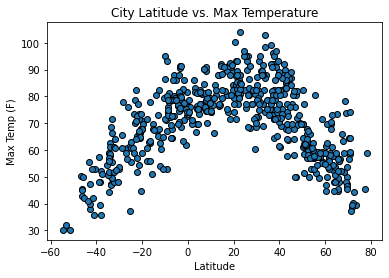

In [15]:
lat_vs_temp["Lat"] = pd.to_numeric(lat_vs_temp["Lat"])
lat_vs_temp["Max Temp"] = pd.to_numeric(lat_vs_temp["Max Temp"])
x_axis = lat_vs_temp["Lat"]
y_axis = lat_vs_temp["Max Temp (F)"]
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")

## Latitude vs. Humidity Plot

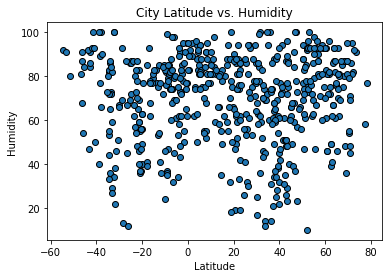

In [16]:
lat_vs_hum = weather_df[["Lat", "Humidity"]]
x_axis = lat_vs_hum["Lat"]
y_axis = lat_vs_hum["Humidity"]
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis, edgecolors="black")

## Latitude vs. Cloudiness Plot

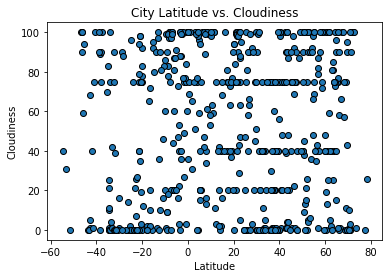

In [17]:
lat_vs_cloud = weather_df[["Lat", "Cloudiness"]]
lat_vs_cloud.dtypes
x_axis = lat_vs_cloud["Lat"]
y_axis = lat_vs_cloud["Cloudiness"]
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis, edgecolors="black")

## Latitude vs. Wind Speed Plot

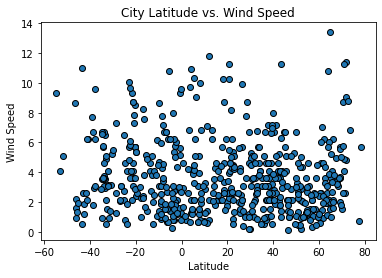

In [18]:
lat_vs_wind = weather_df[["Lat", "Wind Speed"]]
x_axis = lat_vs_wind["Lat"]
y_axis = lat_vs_wind["Wind Speed"]
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_vs_hum_plot = plt.scatter(x_axis, y_axis, edgecolors="black")

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots

def lin_reg(x_axis, y_axis):
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
   regress_values = x_axis * slope + intercept
   line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
   plt.plot(x_axis, regress_values,"r")
   plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = weather_df[weather_df['Lat']>1]
south_hemi = weather_df[weather_df['Lat']<1]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


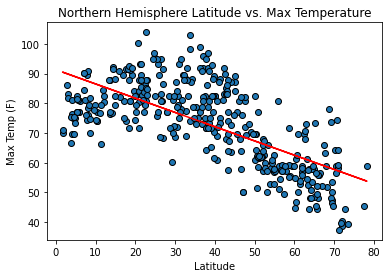

In [21]:

north_hemi["Max Temp (F)"] = north_hemi["Max Temp"] * 9/5 - 459.67
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Max Temp (F)"]
plt.title("Northern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


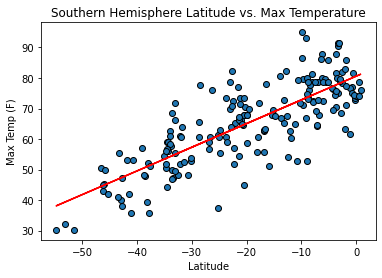

In [22]:
south_hemi["Max Temp (F)"] = south_hemi["Max Temp"] * 9/5 - 459.67
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Max Temp (F)"]
plt.title("Southern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

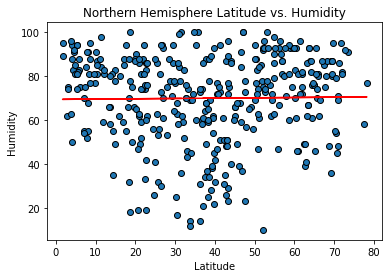

In [23]:
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Humidity"]
plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

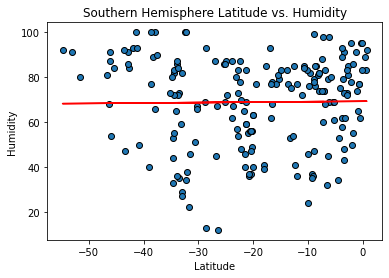

In [24]:
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Humidity"]
plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

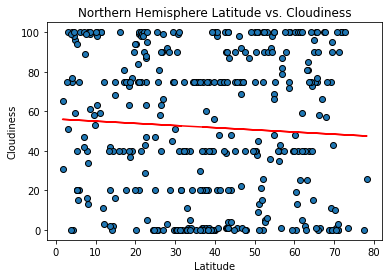

In [25]:
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Cloudiness"]
plt.title("Northern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

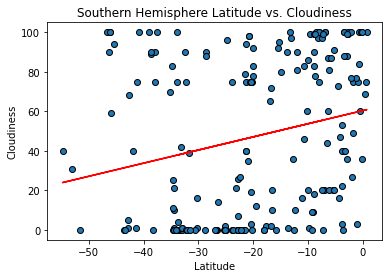

In [26]:
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Cloudiness"]
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

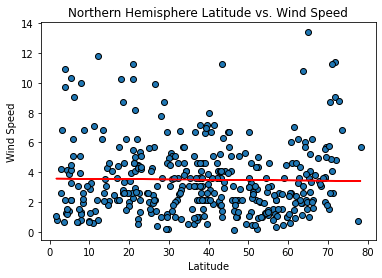

In [27]:
x_axis = north_hemi["Lat"]
y_axis = north_hemi["Wind Speed"]
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

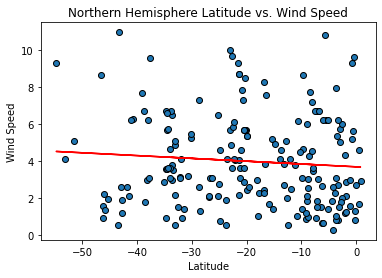

In [28]:
x_axis = south_hemi["Lat"]
y_axis = south_hemi["Wind Speed"]
plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_vs_temp_plot = plt.scatter(x_axis, y_axis, edgecolors="black")
lin_reg(x_axis, y_axis)